<a href="https://colab.research.google.com/github/viznuv/News_model_effect/blob/main/News_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

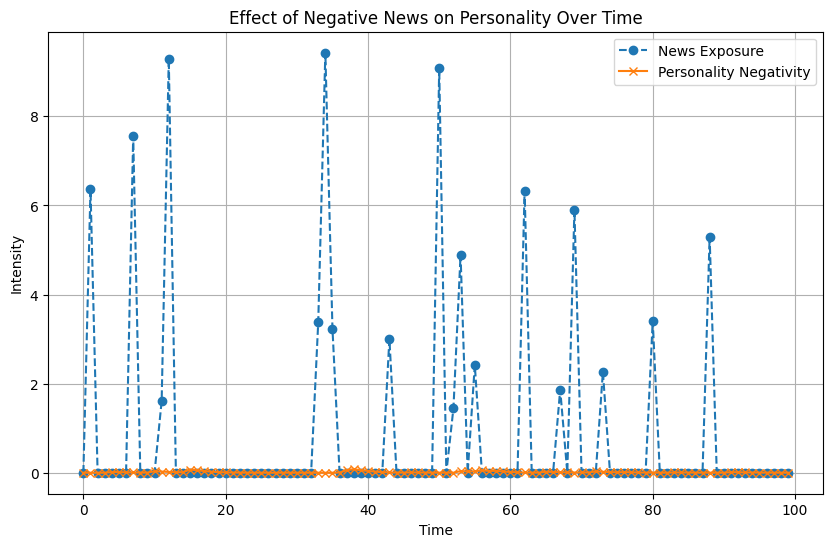

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def weibull_adstock(exposures, shape, scale, max_lag):
    """
    Applies a Weibull adstock transformation to a time series of exposures.

    Parameters:
    - exposures: np.array of news exposure intensities over time.
    - shape: shape parameter of the Weibull decay.
    - scale: scale parameter of the Weibull decay.
    - max_lag: maximum number of past periods to include.

    Returns:
    - adstocked: np.array of adstocked exposures.
    """
    # Create decay weights for lags 0 to max_lag-1 using the Weibull decay function.
    weights = np.array([np.exp(- ((i) / scale) ** shape) for i in range(max_lag)])

    adstocked = np.zeros_like(exposures)
    # For each time t, sum over the past max_lag exposures weighted by the decay weights.
    for t in range(len(exposures)):
        # Determine the window of available past exposures (taking care at the start of the series)
        window = exposures[max(0, t - max_lag + 1):t+1][::-1]
        current_weights = weights[:len(window)]
        adstocked[t] = np.sum(window * current_weights)

    return adstocked

def hill_saturation(x, ec50, n):
    """
    Applies a Hill function to model saturation effects.

    Parameters:
    - x: np.array input (e.g., adstocked exposure).
    - ec50: the value at which the effect is half-maximal.
    - n: Hill coefficient (steepness).

    Returns:
    - Saturated response as an np.array.
    """
    return (x**n) / (x**n + ec50**n)

def apply_lag(x, lag):
    """
    Shifts the time series by a specified lag (in time steps).

    Parameters:
    - x: np.array input series.
    - lag: integer number of periods to delay the effect.

    Returns:
    - Lagged series as an np.array (with zeros padded at the beginning).
    """
    if lag <= 0:
        return x
    return np.concatenate((np.zeros(lag), x[:-lag]))

def simulate_negative_personality_effect(news_exposures, shape, scale, max_lag, ec50, n, lag_effect):
    """
    Combines adstock, lag, and saturation to simulate the effect of negative news on personality.

    Parameters:
    - news_exposures: np.array of negative news intensities over time.
    - shape: shape parameter for Weibull adstock.
    - scale: scale parameter for Weibull adstock.
    - max_lag: maximum lag to include in adstock.
    - ec50: half-saturation parameter for the Hill function.
    - n: Hill coefficient.
    - lag_effect: number of periods to delay the effect.

    Returns:
    - Simulated personality negativity response as an np.array.
    """
    # 1. Apply the adstock effect.
    adstocked = weibull_adstock(news_exposures, shape, scale, max_lag)

    # 2. Apply an explicit lag effect.
    lagged = apply_lag(adstocked, lag_effect)

    # 3. Apply the saturation (Hill) effect.
    saturated = hill_saturation(lagged, ec50, n)

    return saturated

# --------------------------
# Example usage / simulation
# --------------------------
np.random.seed(42)
T = 100  # total number of time periods (e.g., days)

# Simulate some random negative news exposures.
# For instance, we might have infrequent but high-impact negative events.
news_occurrence = np.random.binomial(1, 0.2, size=T)
news_intensity = np.random.uniform(0, 10, size=T)
news_exposures = news_occurrence * news_intensity

# Define parameters for the model.
shape = 1.5      # shape parameter for the Weibull decay (adjust to control the decay shape)
scale = 5.0      # scale parameter for the Weibull decay (adjust for the decay rate)
max_lag = 20     # maximum number of past periods that influence the current state
ec50 = 50.0      # half-saturation constant for the Hill function
n = 2.0          # Hill coefficient (steepness)
lag_effect = 3   # delay (in periods) before the news impacts personality

# Simulate the personality negativity response.
personality_negativity = simulate_negative_personality_effect(
    news_exposures, shape, scale, max_lag, ec50, n, lag_effect
)

# Plot the results.
plt.figure(figsize=(10, 6))
plt.plot(news_exposures, label='News Exposure', marker='o', linestyle='--')
plt.plot(personality_negativity, label='Personality Negativity', marker='x')
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Effect of Negative News on Personality Over Time")
plt.legend()
plt.grid(True)
plt.show()


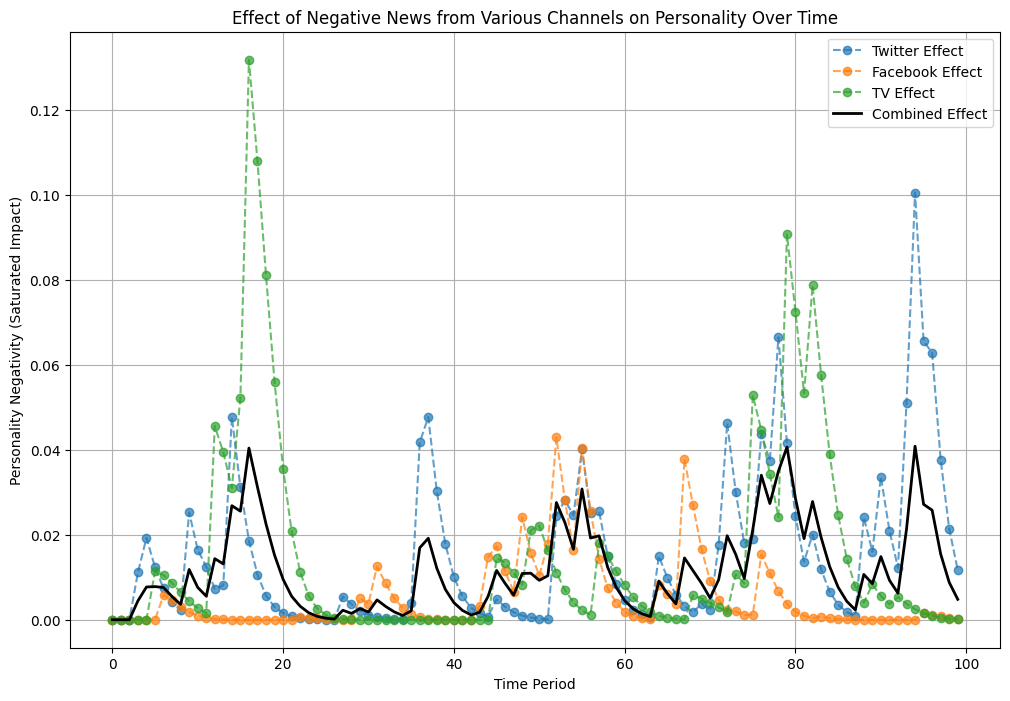

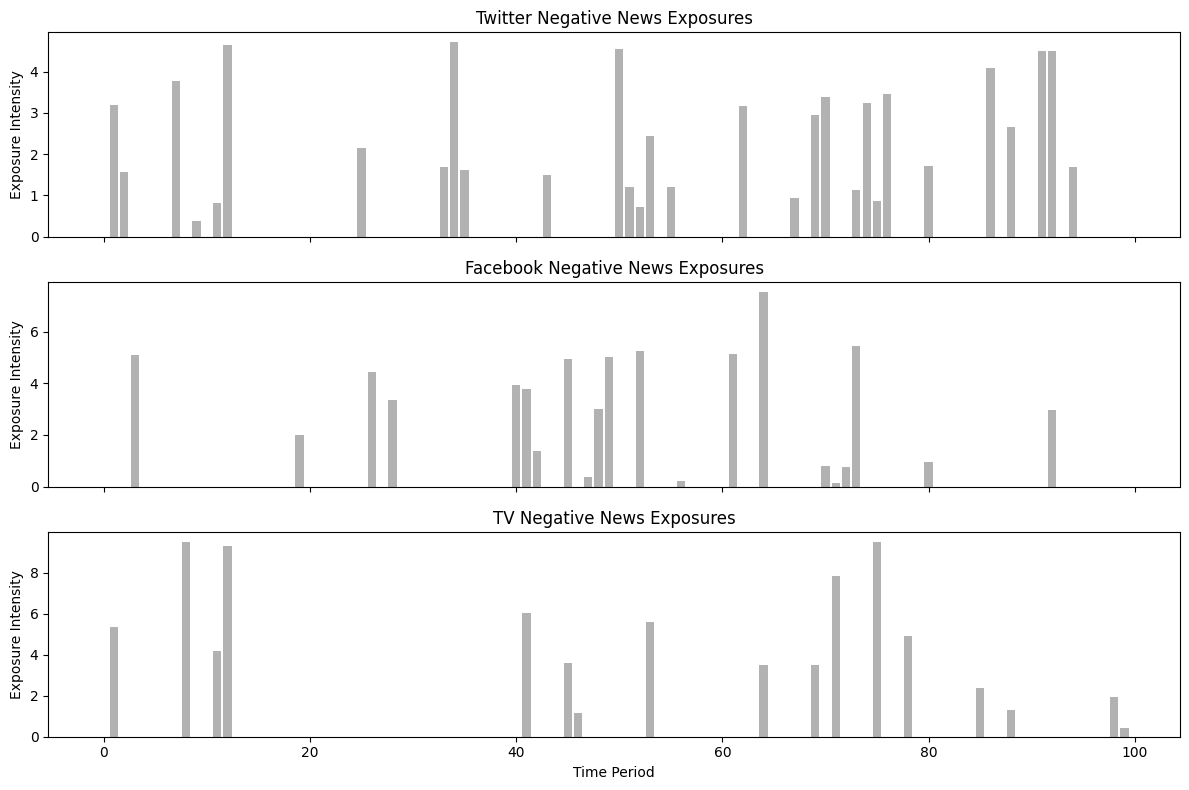

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Model functions definitions
# --------------------------

def weibull_adstock(exposures, shape, scale, max_lag):
    """
    Applies a Weibull adstock transformation to a time series of exposures.

    Parameters:
    - exposures: np.array of news exposure intensities over time.
    - shape: shape parameter of the Weibull decay.
    - scale: scale parameter of the Weibull decay.
    - max_lag: maximum number of past periods to include.

    Returns:
    - adstocked: np.array of adstocked exposures.
    """
    # Create decay weights for lags 0 to max_lag-1 using the Weibull decay function.
    weights = np.array([np.exp(- ((i) / scale) ** shape) for i in range(max_lag)])

    adstocked = np.zeros_like(exposures)
    # For each time t, sum over the past max_lag exposures weighted by the decay weights.
    for t in range(len(exposures)):
        # Determine the window of available past exposures (taking care at the start of the series)
        window = exposures[max(0, t - max_lag + 1):t+1][::-1]
        current_weights = weights[:len(window)]
        adstocked[t] = np.sum(window * current_weights)

    return adstocked

def hill_saturation(x, ec50, n):
    """
    Applies a Hill function to model saturation effects.

    Parameters:
    - x: np.array input (e.g., adstocked exposure).
    - ec50: the value at which the effect is half-maximal.
    - n: Hill coefficient (steepness).

    Returns:
    - Saturated response as an np.array.
    """
    return (x**n) / (x**n + ec50**n)

def apply_lag(x, lag):
    """
    Shifts the time series by a specified lag (in time steps).

    Parameters:
    - x: np.array input series.
    - lag: integer number of periods to delay the effect.

    Returns:
    - Lagged series as an np.array (with zeros padded at the beginning).
    """
    if lag <= 0:
        return x
    return np.concatenate((np.zeros(lag), x[:-lag]))

def simulate_negative_personality_effect(news_exposures, shape, scale, max_lag, ec50, n, lag_effect):
    """
    Combines adstock, lag, and saturation to simulate the effect of negative news on personality.

    Parameters:
    - news_exposures: np.array of negative news intensities over time.
    - shape: shape parameter for Weibull adstock.
    - scale: scale parameter for Weibull adstock.
    - max_lag: maximum lag to include in adstock.
    - ec50: half-saturation parameter for the Hill function.
    - n: Hill coefficient.
    - lag_effect: number of periods to delay the effect.

    Returns:
    - Simulated personality negativity response as an np.array.
    """
    # 1. Apply the adstock effect.
    adstocked = weibull_adstock(news_exposures, shape, scale, max_lag)

    # 2. Apply an explicit lag effect.
    lagged = apply_lag(adstocked, lag_effect)

    # 3. Apply the saturation (Hill) effect.
    saturated = hill_saturation(lagged, ec50, n)

    return saturated

# --------------------------
# Simulation for Multiple Channels
# --------------------------

# Total time periods (e.g., days)
T = 100
np.random.seed(42)

# Define channel-specific settings and model parameters.
# Each channel has exposure parameters (probability of a negative event and intensity range)
# and model parameters (Weibull decay, lag, Hill function saturation, and weight in the combined effect).
channels = {
    "Twitter": {
        "exposure_prob": 0.3,          # likelihood of a negative news event
        "intensity_low": 0,
        "intensity_high": 5,
        "shape": 1.2,                  # Weibull shape parameter
        "scale": 4.0,                  # Weibull scale parameter
        "max_lag": 15,                 # maximum lag periods for adstock
        "ec50": 30.0,                  # half-saturation constant for Hill function
        "n": 2.0,                      # Hill coefficient
        "lag_effect": 2,               # delay in periods
        "weight": 0.4                  # influence weight on overall negativity
    },
    "Facebook": {
        "exposure_prob": 0.2,
        "intensity_low": 0,
        "intensity_high": 8,
        "shape": 1.5,
        "scale": 5.0,
        "max_lag": 20,
        "ec50": 40.0,
        "n": 2.5,
        "lag_effect": 3,
        "weight": 0.35
    },
    "TV": {
        "exposure_prob": 0.1,
        "intensity_low": 0,
        "intensity_high": 10,
        "shape": 1.8,
        "scale": 6.0,
        "max_lag": 25,
        "ec50": 50.0,
        "n": 2.0,
        "lag_effect": 4,
        "weight": 0.25
    },
    # You can add more channels (e.g., Instagram, Radio, etc.) here.
}

# Simulate exposures and compute the channel-specific effects.
channel_effects = {}
time = np.arange(T)

for channel, params in channels.items():
    # Simulate exposures:
    # Binary occurrence of a negative event.
    occurrence = np.random.binomial(1, params["exposure_prob"], size=T)
    # Intensity of the negative event if it occurs.
    intensity = np.random.uniform(params["intensity_low"], params["intensity_high"], size=T)
    exposures = occurrence * intensity

    # Save the exposures for plotting if needed.
    params["exposures"] = exposures

    # Compute the effect using the simulation function.
    effect = simulate_negative_personality_effect(
        exposures,
        params["shape"],
        params["scale"],
        params["max_lag"],
        params["ec50"],
        params["n"],
        params["lag_effect"]
    )

    channel_effects[channel] = effect

# Combine channel effects using the channel-specific weights.
combined_effect = np.zeros(T)
for channel, effect in channel_effects.items():
    weight = channels[channel]["weight"]
    combined_effect += weight * effect

# --------------------------
# Plotting the results
# --------------------------
plt.figure(figsize=(12, 8))

# Plot each channel's negativity effect.
for channel, effect in channel_effects.items():
    plt.plot(time, effect, label=f"{channel} Effect", linestyle='--', marker='o', alpha=0.7)

# Plot the combined effect.
plt.plot(time, combined_effect, label="Combined Effect", color='black', linewidth=2)

plt.xlabel("Time Period")
plt.ylabel("Personality Negativity (Saturated Impact)")
plt.title("Effect of Negative News from Various Channels on Personality Over Time")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# (Optional) Plot the exposures for each channel.
# --------------------------
fig, axs = plt.subplots(len(channels), 1, figsize=(12, 8), sharex=True)
for i, (channel, params) in enumerate(channels.items()):
    axs[i].bar(time, params["exposures"], color='gray', alpha=0.6)
    axs[i].set_title(f"{channel} Negative News Exposures")
    axs[i].set_ylabel("Exposure Intensity")
axs[-1].set_xlabel("Time Period")
plt.tight_layout()
plt.show()


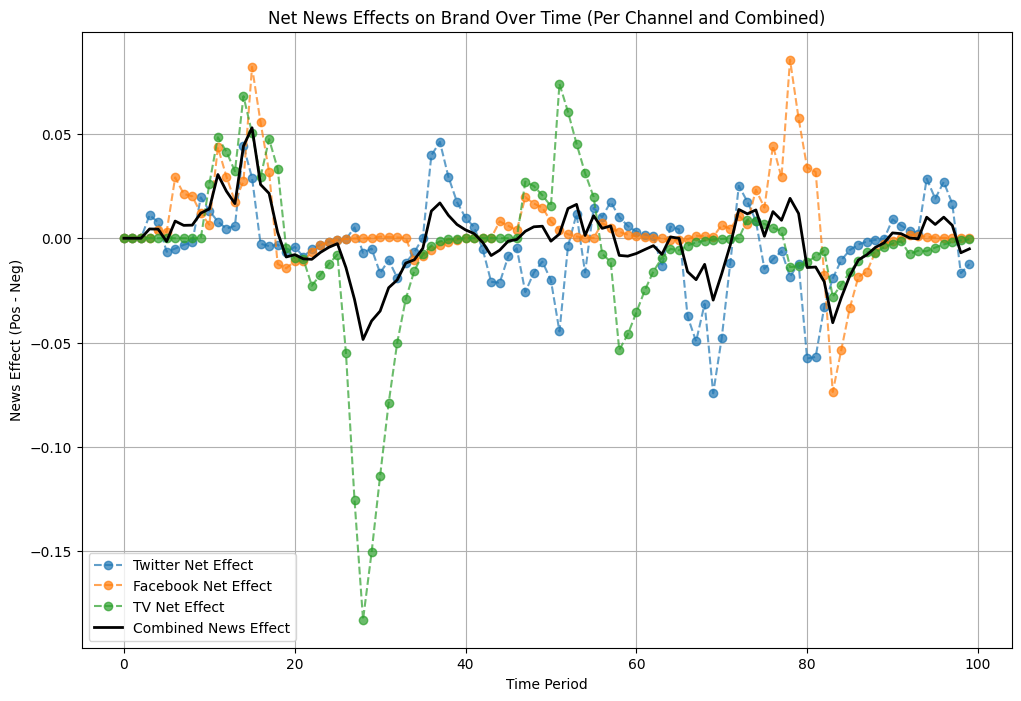

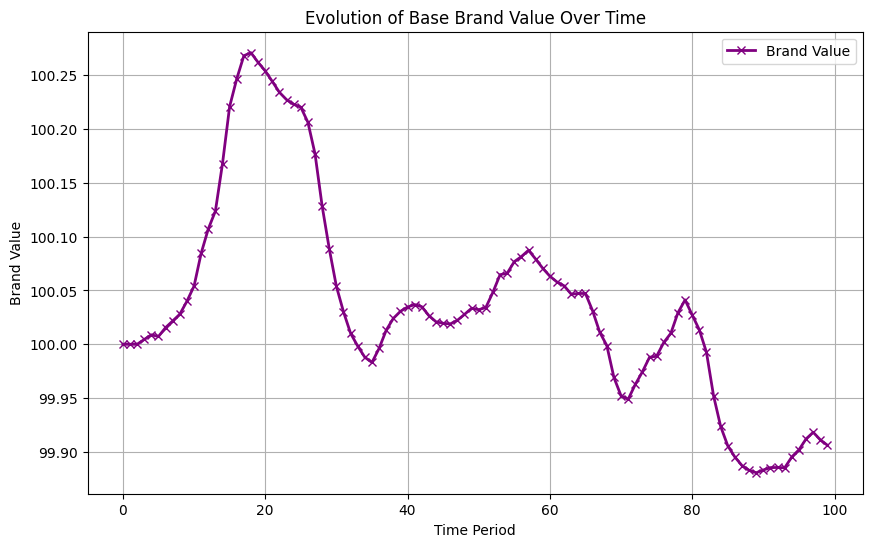

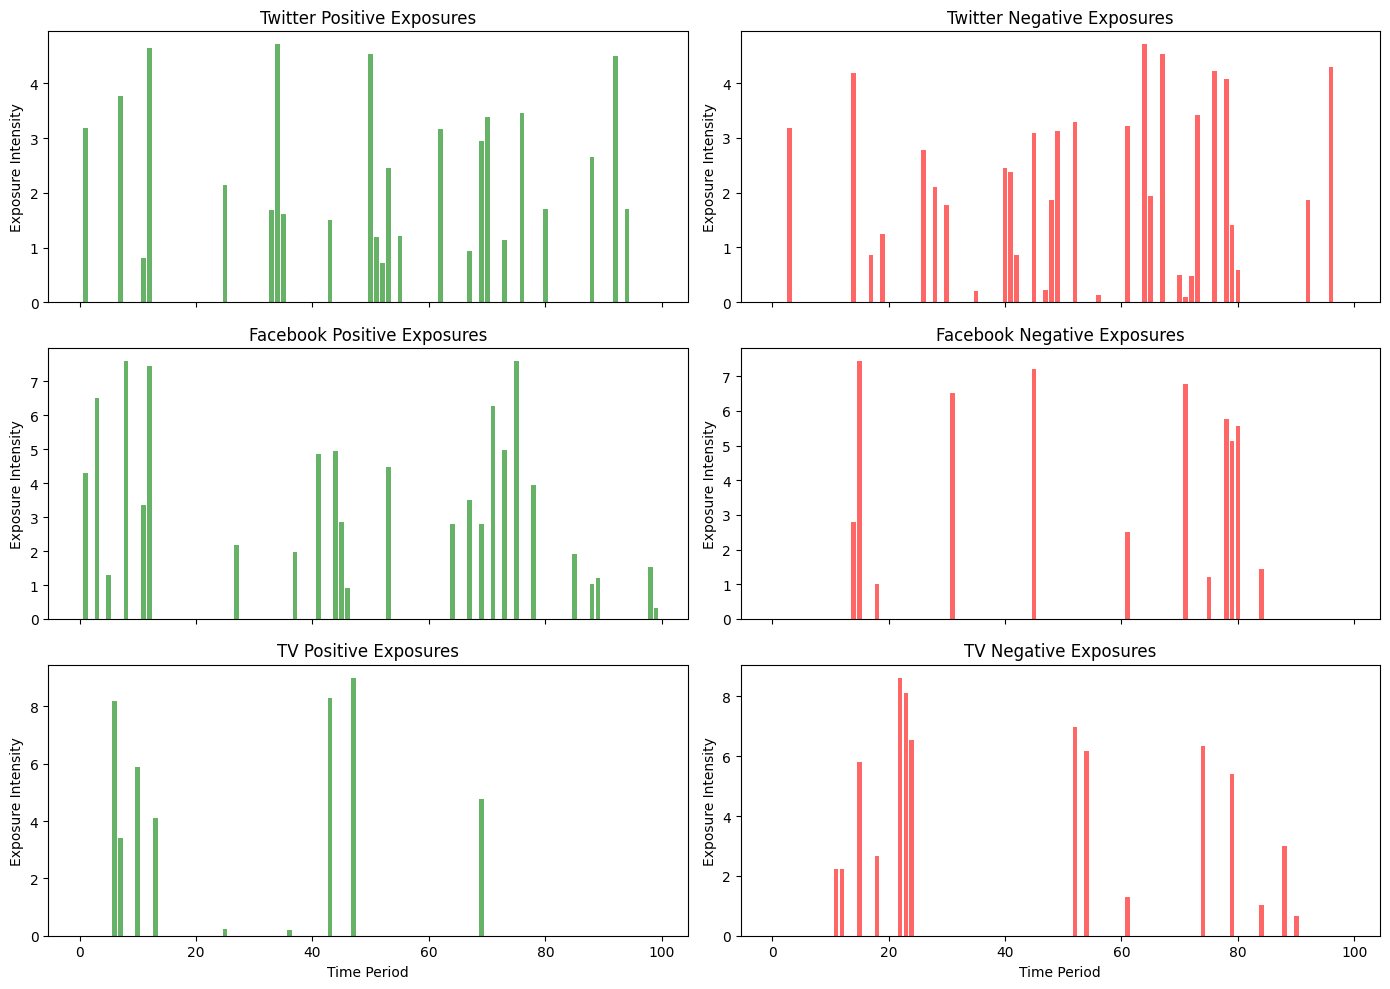

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Model Function Definitions
# --------------------------

def weibull_adstock(exposures, shape, scale, max_lag):
    """
    Applies a Weibull adstock transformation to a time series of exposures.

    Parameters:
        exposures (np.array): Exposure intensities over time.
        shape (float): Shape parameter of the Weibull decay.
        scale (float): Scale parameter of the Weibull decay.
        max_lag (int): Maximum number of past periods to include.

    Returns:
        np.array: Adstocked exposures.
    """
    weights = np.array([np.exp(- ((i) / scale) ** shape) for i in range(max_lag)])
    adstocked = np.zeros_like(exposures)
    for t in range(len(exposures)):
        window = exposures[max(0, t - max_lag + 1):t+1][::-1]
        current_weights = weights[:len(window)]
        adstocked[t] = np.sum(window * current_weights)
    return adstocked

def hill_saturation(x, ec50, n):
    """
    Applies a Hill function to capture saturation effects.

    Parameters:
        x (np.array): Input series (e.g., lagged adstocked exposure).
        ec50 (float): The value at which the effect is half-maximal.
        n (float): Hill coefficient (steepness).

    Returns:
        np.array: Saturated response.
    """
    return (x**n) / (x**n + ec50**n)

def apply_lag(x, lag):
    """
    Shifts the time series by a specified lag (in time steps).

    Parameters:
        x (np.array): Input series.
        lag (int): Number of periods to delay.

    Returns:
        np.array: Lagged series (with zeros padded at the beginning).
    """
    if lag <= 0:
        return x
    return np.concatenate((np.zeros(lag), x[:-lag]))

def simulate_news_effect(news_exposures, shape, scale, max_lag, ec50, n, lag_effect):
    """
    Combines adstock, lag, and saturation to simulate the effect of a news exposure.

    Parameters:
        news_exposures (np.array): Exposure intensities over time.
        shape (float): Weibull shape parameter.
        scale (float): Weibull scale parameter.
        max_lag (int): Maximum lag for the adstock.
        ec50 (float): Half-saturation constant for the Hill function.
        n (float): Hill coefficient.
        lag_effect (int): Lag (in periods) before the effect is felt.

    Returns:
        np.array: The simulated effect over time.
    """
    adstocked = weibull_adstock(news_exposures, shape, scale, max_lag)
    lagged = apply_lag(adstocked, lag_effect)
    effect = hill_saturation(lagged, ec50, n)
    return effect

# --------------------------
# Simulation Setup
# --------------------------

# Total number of time periods (e.g., days)
T = 100
np.random.seed(42)

# Define channel-specific settings.
# Each channel has separate parameters for positive and negative news.
# 'weight' is the overall influence of the channel on brand value.
channels = {
    "Twitter": {
        "pos": {
            "exposure_prob": 0.25,
            "intensity_low": 0,
            "intensity_high": 5,
            "shape": 1.2,
            "scale": 4.0,
            "max_lag": 15,
            "ec50": 30.0,
            "n": 2.0,
            "lag_effect": 2
        },
        "neg": {
            "exposure_prob": 0.30,
            "intensity_low": 0,
            "intensity_high": 5,
            "shape": 1.2,
            "scale": 4.0,
            "max_lag": 15,
            "ec50": 30.0,
            "n": 2.0,
            "lag_effect": 2
        },
        "weight": 0.4
    },
    "Facebook": {
        "pos": {
            "exposure_prob": 0.20,
            "intensity_low": 0,
            "intensity_high": 8,
            "shape": 1.5,
            "scale": 5.0,
            "max_lag": 20,
            "ec50": 40.0,
            "n": 2.5,
            "lag_effect": 3
        },
        "neg": {
            "exposure_prob": 0.20,
            "intensity_low": 0,
            "intensity_high": 8,
            "shape": 1.5,
            "scale": 5.0,
            "max_lag": 20,
            "ec50": 40.0,
            "n": 2.5,
            "lag_effect": 3
        },
        "weight": 0.35
    },
    "TV": {
        "pos": {
            "exposure_prob": 0.10,
            "intensity_low": 0,
            "intensity_high": 10,
            "shape": 1.8,
            "scale": 6.0,
            "max_lag": 25,
            "ec50": 50.0,
            "n": 2.0,
            "lag_effect": 4
        },
        "neg": {
            "exposure_prob": 0.10,
            "intensity_low": 0,
            "intensity_high": 10,
            "shape": 1.8,
            "scale": 6.0,
            "max_lag": 25,
            "ec50": 50.0,
            "n": 2.0,
            "lag_effect": 4
        },
        "weight": 0.25
    },
    # You can add additional channels here.
}

# --------------------------
# Simulation of Channel Effects
# --------------------------

# For each channel, we simulate the positive and negative news streams,
# compute their individual effects, and then compute a net channel effect.
channel_effects = {}
time = np.arange(T)

# For storing exposures (for optional plotting)
for channel, params in channels.items():
    # Simulate Positive Exposures
    pos_occurrence = np.random.binomial(1, params["pos"]["exposure_prob"], size=T)
    pos_intensity = np.random.uniform(params["pos"]["intensity_low"],
                                      params["pos"]["intensity_high"], size=T)
    pos_exposures = pos_occurrence * pos_intensity

    # Simulate Negative Exposures
    neg_occurrence = np.random.binomial(1, params["neg"]["exposure_prob"], size=T)
    neg_intensity = np.random.uniform(params["neg"]["intensity_low"],
                                      params["neg"]["intensity_high"], size=T)
    neg_exposures = neg_occurrence * neg_intensity

    # Store exposures for possible plotting.
    params["pos"]["exposures"] = pos_exposures
    params["neg"]["exposures"] = neg_exposures

    # Compute effects using the simulation function.
    pos_effect = simulate_news_effect(pos_exposures,
                                      params["pos"]["shape"],
                                      params["pos"]["scale"],
                                      params["pos"]["max_lag"],
                                      params["pos"]["ec50"],
                                      params["pos"]["n"],
                                      params["pos"]["lag_effect"])

    neg_effect = simulate_news_effect(neg_exposures,
                                      params["neg"]["shape"],
                                      params["neg"]["scale"],
                                      params["neg"]["max_lag"],
                                      params["neg"]["ec50"],
                                      params["neg"]["n"],
                                      params["neg"]["lag_effect"])

    # For the channel, the net effect is positive minus negative.
    net_effect = pos_effect - neg_effect
    channel_effects[channel] = net_effect

# Combine channel effects using their specified weights.
combined_effect = np.zeros(T)
for channel, effect in channel_effects.items():
    weight = channels[channel]["weight"]
    combined_effect += weight * effect

# --------------------------
# Brand Base Value Dynamics
# --------------------------
# We assume an initial brand value (base brand equity).
# The brand value updates each period depending on the net news effect.
# (Optionally, you could include a recovery term pulling the brand value toward a baseline.)
initial_brand_value = 100.0
brand_value = np.zeros(T)
brand_value[0] = initial_brand_value

# Sensitivity (delta) parameter determines how quickly the news effect changes the brand value.
delta = 1.0
# (Optional) Recovery rate toward a baseline value when no news is present.
recovery_rate = 0.0
baseline_value = initial_brand_value

for t in range(1, T):
    # Simple accumulation model:
    #   brand_value[t] = previous brand value + (delta * combined_effect)
    # Optionally add a recovery term: + recovery_rate*(baseline - previous brand value)
    brand_value[t] = brand_value[t-1] + delta * combined_effect[t] + recovery_rate * (baseline_value - brand_value[t-1])

# --------------------------
# Plotting the Results
# --------------------------

plt.figure(figsize=(12, 8))

# Plot channel net effects.
for channel, effect in channel_effects.items():
    plt.plot(time, effect, label=f"{channel} Net Effect", linestyle='--', marker='o', alpha=0.7)

# Plot the combined effect.
plt.plot(time, combined_effect, label="Combined News Effect", color='black', linewidth=2)
plt.xlabel("Time Period")
plt.ylabel("News Effect (Pos - Neg)")
plt.title("Net News Effects on Brand Over Time (Per Channel and Combined)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of the brand base value.
plt.figure(figsize=(10, 6))
plt.plot(time, brand_value, label="Brand Value", color='purple', linewidth=2, marker='x')
plt.xlabel("Time Period")
plt.ylabel("Brand Value")
plt.title("Evolution of Base Brand Value Over Time")
plt.legend()
plt.grid(True)
plt.show()

# (Optional) Plot exposures for each channel and news type.
fig, axs = plt.subplots(len(channels), 2, figsize=(14, 10), sharex=True)
for i, (channel, params) in enumerate(channels.items()):
    axs[i, 0].bar(time, params["pos"]["exposures"], color='green', alpha=0.6)
    axs[i, 0].set_title(f"{channel} Positive Exposures")
    axs[i, 0].set_ylabel("Exposure Intensity")

    axs[i, 1].bar(time, params["neg"]["exposures"], color='red', alpha=0.6)
    axs[i, 1].set_title(f"{channel} Negative Exposures")
    axs[i, 1].set_ylabel("Exposure Intensity")

axs[-1, 0].set_xlabel("Time Period")
axs[-1, 1].set_xlabel("Time Period")
plt.tight_layout()
plt.show()
